In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

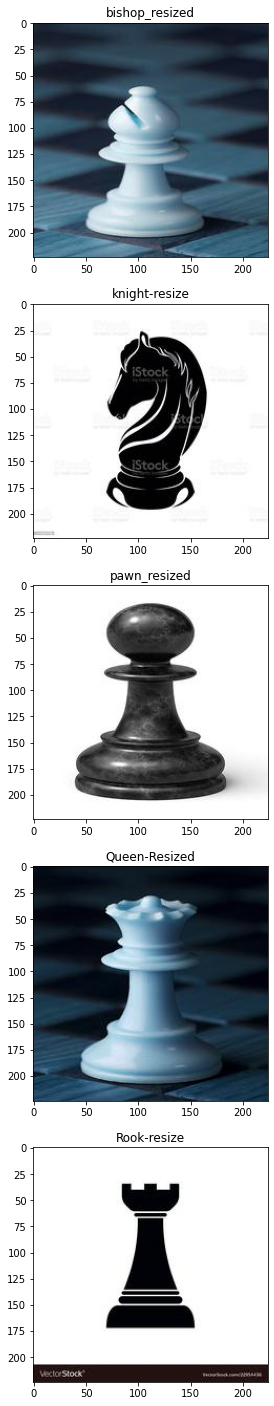

In [90]:
path = 'Dataset/'
data = []
labels = []
text_labels = os.listdir(path)

fig = plt.figure(figsize=(25,25))
for i in range(len(text_labels)):
    path = os.path.join('Dataset/',str(text_labels[i]))
    img = os.listdir(path)
    
    ax = fig.add_subplot(5, 1, i+1)
    imgplot = plt.imshow(cv2.imread(path+'/'+img[0]))
    ax.set_title(text_labels[i])
    
    for x in img:
        image = cv2.imread(path+'/'+x)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224,224))

        data.append(image)
        labels.append(i)

In [71]:
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(651, 224, 224, 3)
(651,)


In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(data,labels,test_size=0.25,random_state=42)

In [73]:
ytrain = to_categorical(ytrain,len(set(labels)))
ytest = to_categorical(ytest,len(set(labels)))

In [74]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape = xtrain.shape[1:], padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), input_shape = xtrain.shape[1:], padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3), input_shape = xtrain.shape[1:], padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), input_shape = xtrain.shape[1:], padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(set(labels)), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 56, 56, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)       

In [75]:
start = model.fit(xtrain,ytrain,batch_size=64,epochs = 30,validation_data=[xtest,ytest])

Epoch 1/30
8/8 [==============================] - 13s 2s/step - loss: 157.8871 - accuracy: 0.2070 - val_loss: 2.0581 - val_accuracy: 0.2209
Epoch 2/30
8/8 [==============================] - 12s 1s/step - loss: 2.0316 - accuracy: 0.1947 - val_loss: 1.6390 - val_accuracy: 0.2515
Epoch 3/30
8/8 [==============================] - 12s 1s/step - loss: 1.5834 - accuracy: 0.2807 - val_loss: 1.6962 - val_accuracy: 0.2454
Epoch 4/30
8/8 [==============================] - 13s 2s/step - loss: 1.5757 - accuracy: 0.2992 - val_loss: 1.5558 - val_accuracy: 0.3190
Epoch 5/30
8/8 [==============================] - 12s 1s/step - loss: 1.4912 - accuracy: 0.3299 - val_loss: 1.6137 - val_accuracy: 0.3804
Epoch 6/30
8/8 [==============================] - 12s 2s/step - loss: 1.3841 - accuracy: 0.4160 - val_loss: 1.5888 - val_accuracy: 0.3742
Epoch 7/30
8/8 [==============================] - 12s 1s/step - loss: 1.2423 - accuracy: 0.4918 - val_loss: 1.6370 - val_accuracy: 0.3558
Epoch 8/30
8/8 [================

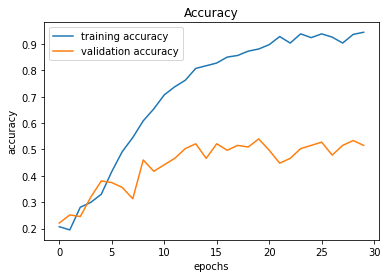

In [76]:
plt.plot(start.history['accuracy'], label='training accuracy')
plt.plot(start.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

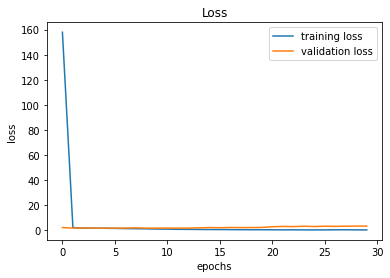

In [77]:
plt.plot(start.history['loss'], label='training loss')
plt.plot(start.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()